In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Simulasi data penjualan bulanan untuk beberapa produk
Bulan = pd.date_range(start='2022-01-01', periods=12, freq='M')
Barang = ['Kursi', 'Meja', 'Lemari', 'Pintu']

# Membuat dataframe simulasi
data_penjualan = pd.DataFrame({
    'Bulan': np.tile(Bulan, len(Barang)),
    'Barang': np.repeat(Barang, len(Bulan)),
    'Penjualan': np.random.randint(10,80 , size=len(Barang) * len(Bulan)),
})
# Menentukan harga per unit untuk setiap barang
harga_per_barang = {
    'Kursi': 300000,
    'Meja': 650000,
    'Lemari': 1000000,
    'Pintu': 780000
}

# Menambahkan kolom pendapatan berdasarkan barang dan penjualan
data_penjualan['Pendapatan'] = data_penjualan.apply(lambda row: row['Penjualan'] * harga_per_barang[row['Barang']], axis=1)

# Menampilkan hasil
df = pd.DataFrame(data_penjualan)
df.sample(n=10)

,Bulan,Barang,Penjualan,Pendapatan
37,2022-02-28,Pintu,55,42900000
39,2022-04-30,Pintu,22,17160000
20,2022-09-30,Meja,13,8450000
13,2022-02-28,Meja,65,42250000
28,2022-05-31,Lemari,60,60000000
31,2022-08-31,Lemari,69,69000000
30,2022-07-31,Lemari,21,21000000
1,2022-02-28,Kursi,60,18000000
41,2022-06-30,Pintu,58,45240000
19,2022-08-31,Meja,30,19500000


In [23]:
df

,Bulan,Barang,Penjualan,Pendapatan
0,2022-01-31,Kursi,43,12900000
1,2022-02-28,Kursi,60,18000000
2,2022-03-31,Kursi,21,6300000
3,2022-04-30,Kursi,59,17700000
4,2022-05-31,Kursi,15,4500000
5,2022-06-30,Kursi,28,8400000
6,2022-07-31,Kursi,79,23700000
7,2022-08-31,Kursi,37,11100000
8,2022-09-30,Kursi,17,5100000
9,2022-10-31,Kursi,49,14700000


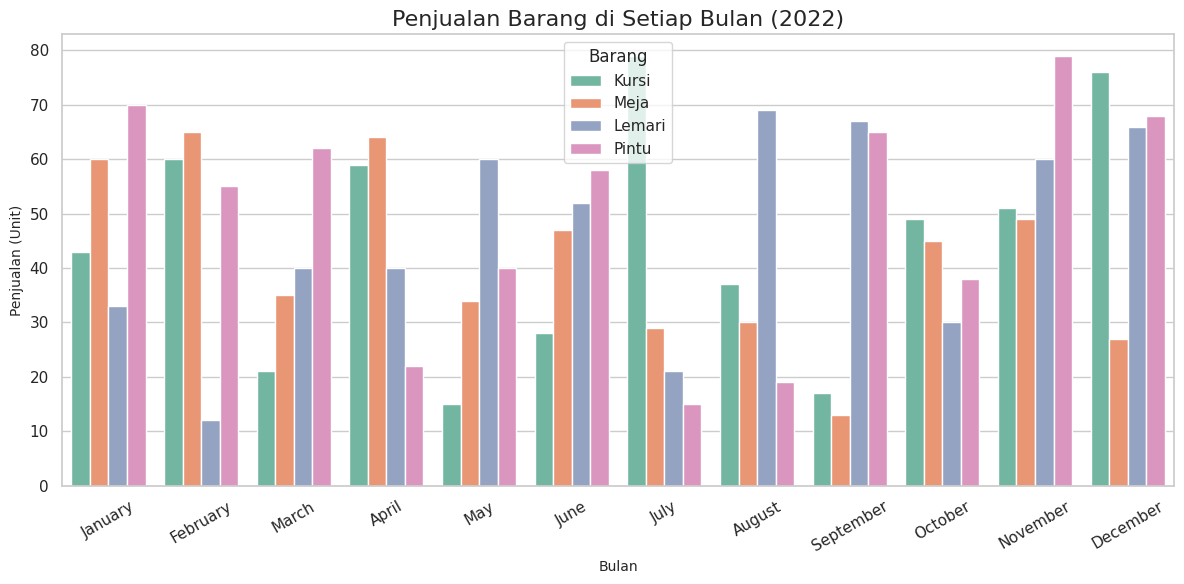

In [25]:
# Menambahkan kolom pendapatan berdasarkan penjualan dan harga barang
data_penjualan['Pendapatan'] = data_penjualan.apply(lambda row: row['Penjualan'] * harga_per_barang[row['Barang']], axis=1)

# Membuat barplot untuk menampilkan penjualan barang di setiap bulan
plt.figure(figsize=(12, 6))
sns.barplot(x=data_penjualan['Bulan'].dt.strftime('%B'), y='Penjualan', hue='Barang', data=data_penjualan, palette='Set2')
plt.xticks(rotation=30)
plt.title('Penjualan Barang di Setiap Bulan (2022)', fontsize=16)
plt.xlabel('Bulan', fontsize=10)
plt.ylabel('Penjualan (Unit)', fontsize=10)
plt.legend(title='Barang')
plt.tight_layout()
plt.show()

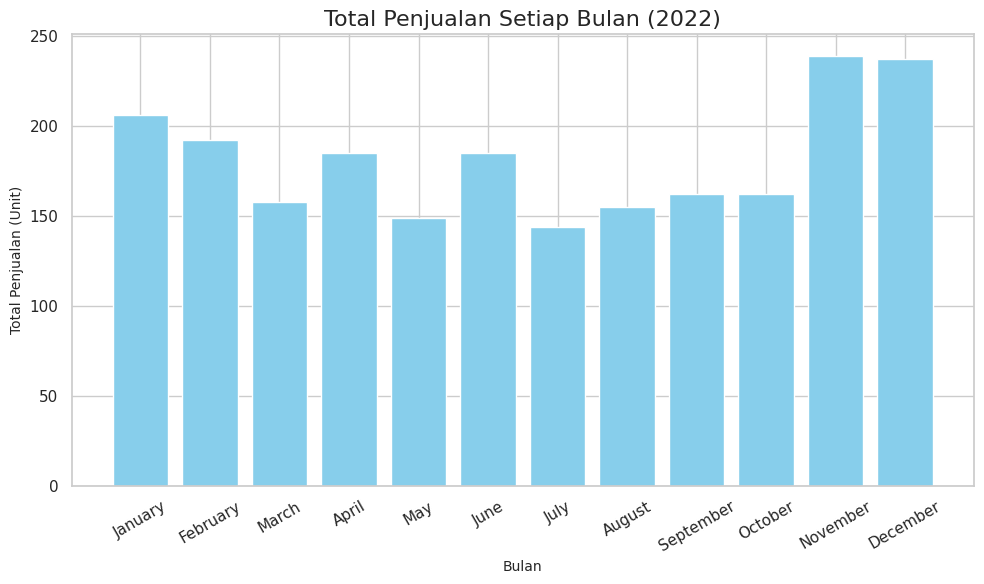

In [19]:
# Mengelompokkan data berdasarkan bulan dan menghitung total penjualan
total_penjualan_bulanan = data_penjualan.groupby('Bulan')['Penjualan'].sum().reset_index()

# Membuat visualisasi bar plot untuk total penjualan setiap bulan
plt.figure(figsize=(10, 6))
plt.bar(total_penjualan_bulanan['Bulan'].dt.strftime('%B'), total_penjualan_bulanan['Penjualan'], color='skyblue')
plt.xticks(rotation=30)
plt.title('Total Penjualan Setiap Bulan (2022)', fontsize=16)
plt.xlabel('Bulan', fontsize=10)
plt.ylabel('Total Penjualan (Unit)', fontsize=10)
plt.tight_layout()
plt.show()

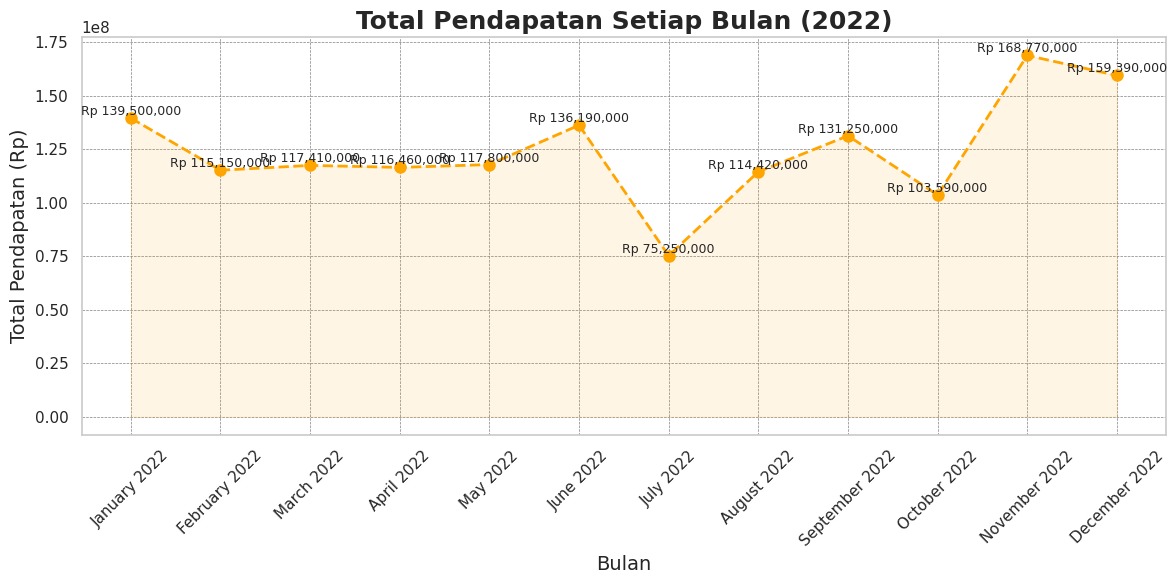

In [27]:
# Menghitung pendapatan
data_penjualan['Pendapatan'] = data_penjualan.apply(lambda row: row['Penjualan'] * harga_per_barang[row['Barang']], axis=1)

# Mengelompokkan data berdasarkan bulan dan menghitung total pendapatan
total_pendapatan_bulanan = data_penjualan.groupby('Bulan')['Pendapatan'].sum().reset_index()

# Mengurutkan bulan sesuai dengan urutan
total_pendapatan_bulanan['Bulan'] = total_pendapatan_bulanan['Bulan'].dt.strftime('%B %Y')

# Membuat visualisasi line plot untuk total pendapatan setiap bulan
plt.figure(figsize=(12, 6))
plt.plot(total_pendapatan_bulanan['Bulan'], total_pendapatan_bulanan['Pendapatan'],
         marker='o', markersize=8, color='orange', linewidth=2, linestyle='--')

# Mengisi area di bawah garis
plt.fill_between(total_pendapatan_bulanan['Bulan'], total_pendapatan_bulanan['Pendapatan'],
                 color='orange', alpha=0.1)

# Menambahkan anotasi untuk setiap titik
for i, value in enumerate(total_pendapatan_bulanan['Pendapatan']):
    plt.text(total_pendapatan_bulanan['Bulan'][i], value, f'Rp {value:,.0f}',
             fontsize=9, ha='center', va='bottom')

# Mengatur tampilan sumbu dan judul
plt.xticks(rotation=45)
plt.title('Total Pendapatan Setiap Bulan (2022)', fontsize=18, fontweight='bold')
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Total Pendapatan (Rp)', fontsize=14)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Menampilkan plot
plt.show()